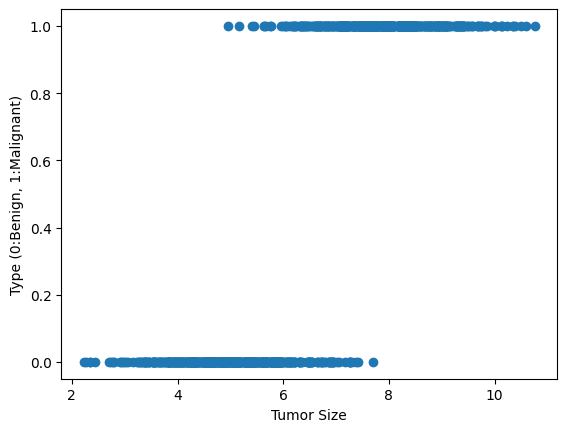

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)

# Simulate data
num_samples = 1000
tumor_size_benign = np.random.normal(5, 1, num_samples//2)
tumor_size_malignant = np.random.normal(8, 1, num_samples//2)
tumor_sizes = np.hstack((tumor_size_benign, tumor_size_malignant))
labels = np.hstack((np.zeros(num_samples//2), np.ones(num_samples//2)))

plt.scatter(tumor_sizes, labels)
plt.xlabel('Tumor Size')
plt.ylabel('Type (0:Benign, 1:Malignant)')
plt.show()


In [6]:
# Logistic Regression Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, beta):
    m = len(y)
    predictions = sigmoid(np.dot(X, beta))
    error = (-y * np.log(predictions)) - ((1-y)*np.log(1-predictions))
    cost = 1/m * sum(error)
    gradient = 1/m * np.dot(X.transpose(), (predictions - y))
    return cost, gradient

def logistic_regression(X, y, beta, alpha, num_iterations):
    for i in range(num_iterations):
        cost, gradient = compute_cost(X, y, beta)
        beta -= alpha * gradient
        if i % 100 == 0:
            print(f"Cost at iteration {i}: {cost}")
    return beta

def predict(X, beta):
    """Predict whether the label is 0 or 1 using learned logistic regression parameters"""
    predictions = sigmoid(np.dot(X, beta))
    return [1 if x >= 0.5 else 0 for x in predictions]


In [7]:
# train and evaluate logistic function
# Adding a bias term
X = np.c_[np.ones((tumor_sizes.shape[0], 1)), tumor_sizes]
y = labels
beta = np.zeros(X.shape[1])

alpha = 0.01
num_iterations = 1000
new_beta = logistic_regression(X, y, beta, alpha, num_iterations)

# Predict the labels on the dataset
predicted_labels = predict(X, new_beta)

# Check accuracy
correctly_classified = np.sum(predicted_labels == labels)
accuracy = (correctly_classified / labels.shape[0]) * 100
print(f"Accuracy: {accuracy:.2f}%")


Cost at iteration 0: 0.6931471805599322
Cost at iteration 100: 0.6584483114803507
Cost at iteration 200: 0.647791406019385
Cost at iteration 300: 0.6374833433137697
Cost at iteration 400: 0.6275124362903887
Cost at iteration 500: 0.6178671637231371
Cost at iteration 600: 0.6085362003912264
Cost at iteration 700: 0.5995084430327593
Cost at iteration 800: 0.5907730322941891
Cost at iteration 900: 0.5823193709118756
Accuracy: 69.50%


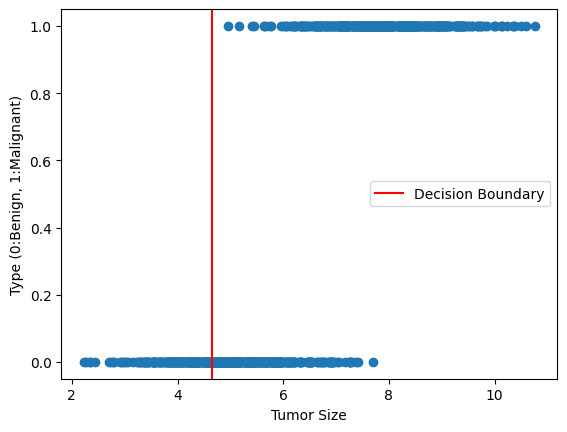

In [8]:
#visualize decision boundry
plt.scatter(tumor_sizes, labels)

# Decision boundary calculation
x_boundary = -new_beta[0] / new_beta[1]

plt.axvline(x=x_boundary, color='r', label='Decision Boundary')
plt.xlabel('Tumor Size')
plt.ylabel('Type (0:Benign, 1:Malignant)')
plt.legend()
plt.show()


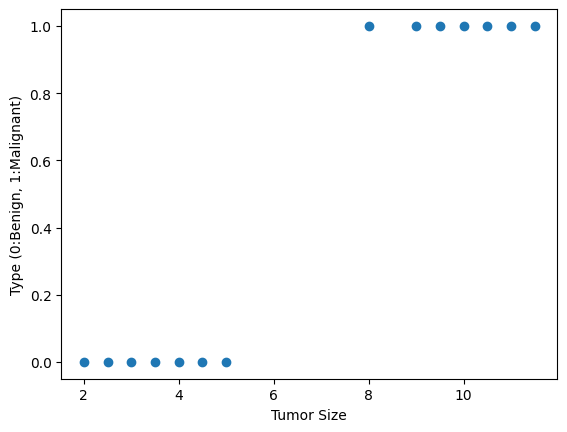

Cost at iteration 0: 0.6931471805599453
Cost at iteration 100: 0.5637003554873954
Cost at iteration 200: 0.531019032736254
Cost at iteration 300: 0.5012059388809653
Cost at iteration 400: 0.4740015467571614
Cost at iteration 500: 0.4491597896971252
Cost at iteration 600: 0.4264512053676719
Cost at iteration 700: 0.4056645644699549
Cost at iteration 800: 0.38660735628412024
Cost at iteration 900: 0.3691054645430586
Accuracy: 92.86%


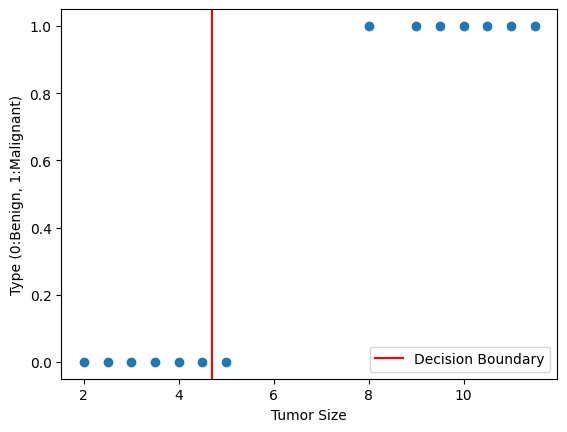

In [21]:
# simulated data

import numpy as np
import matplotlib.pyplot as plt

# Manual data
tumor_sizes = np.array([2, 2.5, 3, 3.5, 4, 4.5, 5, 8, 9, 9.5, 10, 10.5, 11, 11.5])
labels = np.array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

plt.scatter(tumor_sizes, labels)
plt.xlabel('Tumor Size')
plt.ylabel('Type (0:Benign, 1:Malignant)')
plt.show()


# Logistic Regression Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, beta):
    m = len(y)
    predictions = sigmoid(np.dot(X, beta))
    error = (-y * np.log(predictions)) - ((1-y)*np.log(1-predictions))
    cost = 1/m * sum(error)
    gradient = 1/m * np.dot(X.transpose(), (predictions - y))
    return cost, gradient

def logistic_regression(X, y, beta, alpha, num_iterations):
    for i in range(num_iterations):
        cost, gradient = compute_cost(X, y, beta)
        beta -= alpha * gradient
        if i % 100 == 0:
            print(f"Cost at iteration {i}: {cost}")
    return beta

def predict(X, beta):
    """Predict whether the label is 0 or 1 using learned logistic regression parameters"""
    predictions = sigmoid(np.dot(X, beta))
    return [1 if x >= 0.5 else 0 for x in predictions]


# train and evaluate logistic function
# Adding a bias term
X = np.c_[np.ones((tumor_sizes.shape[0], 1)), tumor_sizes]
y = labels
beta = np.zeros(X.shape[1])

alpha = 0.01
num_iterations = 1000
new_beta = logistic_regression(X, y, beta, alpha, num_iterations)

# Predict the labels on the dataset
predicted_labels = predict(X, new_beta)

# Check accuracy
correctly_classified = np.sum(predicted_labels == labels)
accuracy = (correctly_classified / labels.shape[0]) * 100
print(f"Accuracy: {accuracy:.2f}%")

#visualize decision boundary
plt.scatter(tumor_sizes, labels)

# Decision boundary calculation
x_boundary = -new_beta[0] / new_beta[1]

plt.axvline(x=x_boundary, color='r', label='Decision Boundary')
plt.xlabel('Tumor Size')
plt.ylabel('Type (0:Benign, 1:Malignant)')
plt.legend()
plt.show()


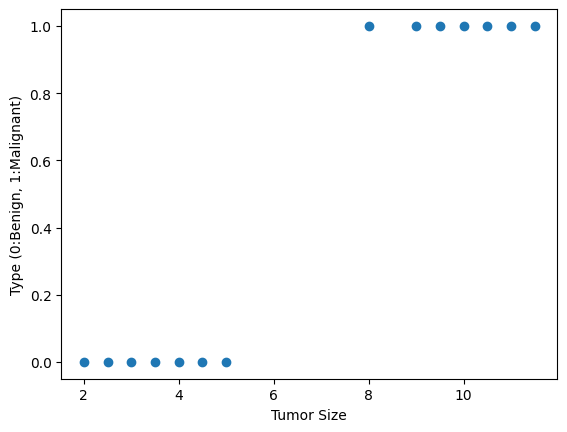

Accuracy: 100.00%


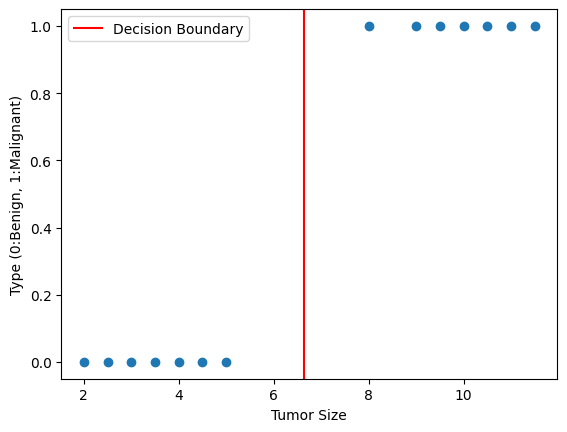

In [23]:
#using Sklean logistic regression 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Manual data
tumor_sizes = np.array([2, 2.5, 3, 3.5, 4, 4.5, 5, 8, 9, 9.5, 10, 10.5, 11, 11.5])
labels = np.array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

plt.scatter(tumor_sizes, labels)
plt.xlabel('Tumor Size')
plt.ylabel('Type (0:Benign, 1:Malignant)')
plt.show()

# Training the logistic regression model
X = tumor_sizes.reshape(-1, 1)  # Reshaping to make it a 2D array
model = LogisticRegression(solver='lbfgs')  # lbfgs is a commonly used solver
model.fit(X, labels)

# Predict the labels on the dataset
predicted_labels = model.predict(X)

# Check accuracy
correctly_classified = np.sum(predicted_labels == labels)
accuracy = (correctly_classified / labels.shape[0]) * 100
print(f"Accuracy: {accuracy:.2f}%")

# Visualize decision boundary
plt.scatter(tumor_sizes, labels)

# Decision boundary calculation
x_boundary = -model.intercept_[0] / model.coef_[0][0]

plt.axvline(x=x_boundary, color='r', label='Decision Boundary')
plt.xlabel('Tumor Size')
plt.ylabel('Type (0:Benign, 1:Malignant)')
plt.legend()
plt.show()


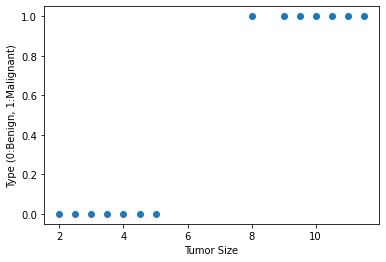

Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Accuracy: 1.00


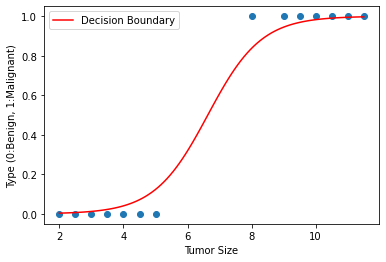

In [1]:
#Precision,recall,F1-score and accuracy

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Manual data
tumor_sizes = np.array([2, 2.5, 3, 3.5, 4, 4.5, 5, 8, 9, 9.5, 10, 10.5, 11, 11.5])
labels = np.array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

plt.scatter(tumor_sizes, labels)
plt.xlabel('Tumor Size')
plt.ylabel('Type (0:Benign, 1:Malignant)')
plt.show()

# Training the logistic regression model
X = tumor_sizes.reshape(-1, 1)  # Reshaping to make it a 2D array
model = LogisticRegression(solver='lbfgs')  # lbfgs is a commonly used solver
model.fit(X, labels)

# Predict the labels on the dataset
predicted_labels = model.predict(X)

# Get probability of each class prediction
predicted_probabilities = model.predict_proba(X)

# Precision, recall, F1 score, and accuracy
precision = metrics.precision_score(labels, predicted_labels)
recall = metrics.recall_score(labels, predicted_labels)
f1_score = metrics.f1_score(labels, predicted_labels)
accuracy = metrics.accuracy_score(labels, predicted_labels)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")
print(f"Accuracy: {accuracy:.2f}")

# Visualize decision boundary
plt.scatter(tumor_sizes, labels)

# Decision boundary calculation
x_boundary = np.linspace(start=min(tumor_sizes), stop=max(tumor_sizes), num=100)
y_values = model.predict_proba(x_boundary.reshape(-1, 1))[:, 1]

plt.plot(x_boundary, y_values, color='r', label='Decision Boundary')
plt.xlabel('Tumor Size')
plt.ylabel('Type (0:Benign, 1:Malignant)')
plt.legend()
plt.show()
